## <br/><br/>
<a id='Header' style="font-size:40px; color:#1D2951; text-decoration:none; text-align:center;">
    <center><b>Text Sentiment Analysis</b></center>
</a>

<br/><br/>

<a id='Header' style="font-size:30px; color:#1D2951; text-decoration:none">
    <b> Table of Contents </b>
</a> 
<ul>
<li><a href="#libraries" style="font-size:15px; color:#1D2951">Importing Libraries</a></li>
<li><a href="#overview" style="font-size:15px; color:#1D2951">Dataset Overview</a></li>
<li><a href="#wrangling" style="font-size:15px; color:#1D2951">Text Cleaning</a></li>
<li><a href="#Analysis" style="font-size:15px; color:#1D2951">Get Analysis</a></li>
<li><a href="#Visual" style="font-size:15px; color:#1D2951">Visualization</a></li>

<li><a href="#end" style="font-size:15px; color:#1D2951">Submission</a></li>

</ul>

<hr>

<a id='libraries' style="font-size:30px; color:#1D2951; text-decoration:none"><b>Importing Libraries</b></a>

In [1]:
from textblob import TextBlob
from wordcloud import WordCloud
import re
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import nltk
#nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

plt.style.use('fivethirtyeight')

C:\Users\OsamaFouad\Anaconda3\lib\site-packages\sklearn\utils\validation.py:37: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  LARGE_SPARSE_SUPPORTED = LooseVersion(scipy_version) >= '0.14.0'


<a id='overview' style="font-size:30px; color:#1D2951; text-decoration:none"><b>Dataset Overview</b></a>

In [2]:
reviews = pd.read_csv('Amazon_Review.csv')
reviews.head(2)

C:\Users\OsamaFouad\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (1,10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,...,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,This product so far has not disappointed. My c...,Kindle,NaN,NaN,Adapter
1,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,great for beginner or experienced person. Boug...,very fast,NaN,NaN,truman


In [3]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34660 entries, 0 to 34659
Data columns (total 21 columns):
id                      34660 non-null object
name                    27900 non-null object
asins                   34658 non-null object
brand                   34660 non-null object
categories              34660 non-null object
keys                    34660 non-null object
manufacturer            34660 non-null object
reviews.date            34621 non-null object
reviews.dateAdded       24039 non-null object
reviews.dateSeen        34660 non-null object
reviews.didPurchase     1 non-null object
reviews.doRecommend     34066 non-null object
reviews.id              1 non-null float64
reviews.numHelpful      34131 non-null float64
reviews.rating          34627 non-null float64
reviews.sourceURLs      34660 non-null object
reviews.text            34659 non-null object
reviews.title           34655 non-null object
reviews.userCity        0 non-null float64
reviews.userProvince    0

In [4]:
reviews.rename(columns={'reviews.text': 'Feedback',
                        'reviews.rating': 'Rate'}, inplace=True)

In [5]:
reviews = reviews[['Feedback','Rate']]
reviews.isnull().sum()

Feedback     1
Rate        33
dtype: int64

In [6]:
reviews = reviews.astype({"Feedback": str}, errors='raise') 
reviews = reviews.dropna()

In [7]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34627 entries, 0 to 34659
Data columns (total 2 columns):
Feedback    34627 non-null object
Rate        34627 non-null float64
dtypes: float64(1), object(1)
memory usage: 811.6+ KB


In [8]:
type(reviews['Feedback'][2])

str

<a id='wrangling' style="font-size:30px; color:#1D2951; text-decoration:none"><b>Text Cleaning</b></a>

In [9]:
def cleantext(text):
    text = re.sub('^@[A-Za-z0-9]+','',text)
    text = re.sub('(#|$|!|%|\*|\-|@)','',text)
    text = re.sub('https?:\/\/\S+','',text)
    text = re.sub(r'\bthats\b', 'that is', text)
    text = re.sub(r'\bive\b', 'i have', text)
    text = re.sub(r'\bim\b', 'i am', text)
    text = re.sub(r"it's", 'it is', text)
    text = re.sub(r"n't", 'not', text)
    text = re.sub(r'\bya\b', 'yeah', text)
    text = re.sub(r'\bcant\b', 'can not', text)
    text = re.sub(r'\bwont\b', 'will not', text)
    text = re.sub(r'\bid\b', 'i would', text)
    text = re.sub(r'wtf', 'what the fuck', text)
    text = re.sub(r'\bwth\b', 'what the hell', text)
    text = re.sub(r'\br\b', 'are', text)
    text = re.sub(r'\bu\b', 'you', text)
    text = re.sub(r'\bk\b', 'OK', text)
    text = re.sub(r'\bsux\b', 'sucks', text)
    text = re.sub(r'\bno+\b', 'no', text)
    text = re.sub(r'\bcoo+\b', 'cool', text)
    
    return text

In [10]:
def remove_stopWords(string):
    stopWords  = set(stopwords.words('english'))

    stopWords.remove("doesn't")
    stopWords.remove("don't")
    stopWords.remove("didn't")
    stopWords.remove('very')
    stopWords.remove('too')
    
    wordTokens = word_tokenize(string)
    
    filterString = [word for word in wordTokens if not word.lower() in stopWords]
    cleanString = " ".join(filterString)

    return cleanString

In [11]:
# Clean diserable data
reviews['Cleaned_Feedback'] = reviews['Feedback'].apply(cleantext)
# Remove stopWords
reviews['remove_StopWords'] = reviews['Cleaned_Feedback'].apply(remove_stopWords)
# # Make all letters are small
reviews['Feedback-Edited'] = reviews['remove_StopWords'].apply(lambda txt: txt.lower())

reviews.head()

,Feedback,Rate,Cleaned_Feedback,remove_StopWords,Feedback-Edited
0,This product so far has not disappointed. My c...,5.0,This product so far has not disappointed. My c...,product far disappointed . children love use l...,product far disappointed . children love use l...
1,great for beginner or experienced person. Boug...,5.0,great for beginner or experienced person. Boug...,great beginner experienced person . Bought gif...,great beginner experienced person . bought gif...
2,Inexpensive tablet for him to use and learn on...,5.0,Inexpensive tablet for him to use and learn on...,"Inexpensive tablet use learn , step NABI . thr...","inexpensive tablet use learn , step nabi . thr..."
3,I've had my Fire HD 8 two weeks now and I love...,4.0,I've had my Fire HD 8 two weeks now and I love...,'ve Fire HD 8 two weeks love . tablet great va...,'ve fire hd 8 two weeks love . tablet great va...
4,I bought this for my grand daughter when she c...,5.0,I bought this for my grand daughter when she c...,"bought grand daughter comes visit . set user ,...","bought grand daughter comes visit . set user ,..."


<a id='Analysis' style="font-size:30px; color:#1D2951; text-decoration:none"><b>Get Analysis</b></a>

In [12]:
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
    return TextBlob(text).sentiment.polarity

def getAnalysis(score):
    if score < -0.1:
        return 'Negative'
    elif score > 0.2:
        return 'Positive'
    else:
        return 'Neutral'

In [20]:
# Change the format of Polarity number to float
pd.options.display.float_format = '{:.2f}'.format

# Create Final Column of Polarity
#reviews['Pol1'] = reviews['Feedback'].apply(getPolarity)
reviews['Polarity'] = reviews['Feedback-Edited'].apply(getPolarity)
reviews['Result'] = reviews['Polarity'].apply(getAnalysis)

reviews.head()

,Feedback,Rate,Cleaned_Feedback,remove_StopWords,Feedback-Edited,Polarity,Result
0,This product so far has not disappointed. My c...,5.00,This product so far has not disappointed. My c...,product far disappointed . children love use l...,product far disappointed . children love use l...,-0.05,Neutral
1,great for beginner or experienced person. Boug...,5.00,great for beginner or experienced person. Boug...,great beginner experienced person . Bought gif...,great beginner experienced person . bought gif...,0.80,Positive
2,Inexpensive tablet for him to use and learn on...,5.00,Inexpensive tablet for him to use and learn on...,"Inexpensive tablet use learn , step NABI . thr...","inexpensive tablet use learn , step nabi . thr...",0.60,Positive
3,I've had my Fire HD 8 two weeks now and I love...,4.00,I've had my Fire HD 8 two weeks now and I love...,'ve Fire HD 8 two weeks love . tablet great va...,'ve fire hd 8 two weeks love . tablet great va...,0.40,Positive
4,I bought this for my grand daughter when she c...,5.00,I bought this for my grand daughter when she c...,"bought grand daughter comes visit . set user ,...","bought grand daughter comes visit . set user ,...",0.39,Positive


In [21]:
reviews[['Feedback','Result']].head()

,Feedback,Result
0,This product so far has not disappointed. My c...,Neutral
1,great for beginner or experienced person. Boug...,Positive
2,Inexpensive tablet for him to use and learn on...,Positive
3,I've had my Fire HD 8 two weeks now and I love...,Positive
4,I bought this for my grand daughter when she c...,Positive


<a id='Visual' style="font-size:30px; color:#1D2951; text-decoration:none"><b>Visualization</b></a>

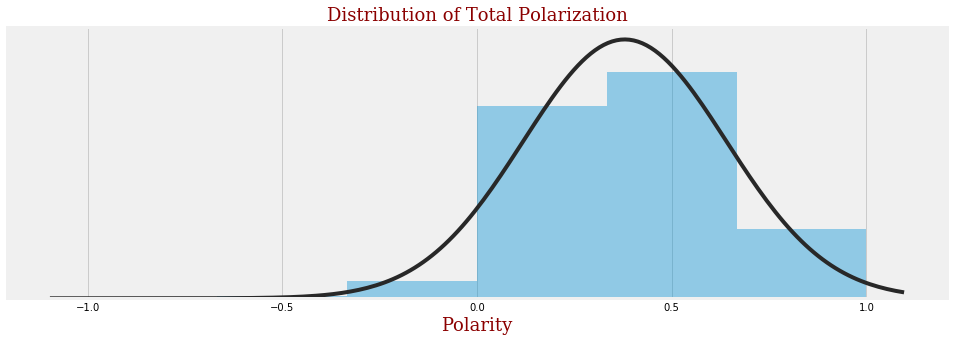

In [15]:
from scipy.stats import norm

font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 18,
        }

ax = reviews['Polarity']
ax = sns.distplot(ax,bins=6, fit=norm, kde=False)
plt.xlabel('Polarity',fontdict=font)
plt.yticks([])
plt.title('Distribution of Total Polarization', fontdict=font)

plt.gcf().set_size_inches(15, 5);

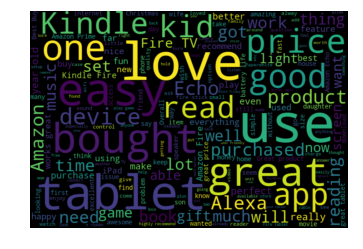

In [16]:
allWords = ' '.join([feedback for feedback in reviews['Feedback']])
wordCloud = WordCloud(width=700, height=480, random_state = 21, max_font_size = 119).generate(allWords)

plt.imshow(wordCloud, interpolation= 'bilinear')
plt.axis('off')
plt.margins(x=0, y=0)
plt.show()

<a id='end' style="font-size:30px; color:#1D2951; text-decoration:none"><b>Submission</b></a>

In [19]:
# feedback = reviews['Feedback']
# Edited = reviews['Feedback-Edited']
# result = reviews['Result']
# output = pd.DataFrame({'Feedback': feedback,'Edited-Feedback':Edited, 'Result': result})
# output.to_csv('Test1.csv', index=False)